In [17]:
import pandas as pd
import numpy as np

import os
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

# Contents
## Line Charts
- Using *matplotlib.plot* (+ axis labels)
- Using *pandas.plot*
- Using semantic indices with *pandas.set_index*
- Styling with *plt.style.use* and *plt.style.context*

## Boxplots
- Using *plot.box* (pandas)

## Scatterplots
- Using *plot.scatter* (pandas)

## Barcharts
- Using *plot.bar* (pandas)

In [18]:
os.chdir('/Users/patrickrs/Documents/Gitlab/patrick-steiner/Exercises')

In [19]:
df = pd.read_csv("data/snb-data-rendoblim-en-all-20170502_1430.csv")
df.head()

,Date,D0,Value
0,1988-01,1J,2.887
1,1988-01,2J,3.218
2,1988-01,3J,3.393
3,1988-01,4J,3.554
4,1988-01,5J,3.695


In [20]:
len(df), len(pd.unique(df['Date'])), len(pd.unique(df['D0'])), pd.unique(df['D0'])

(4224,
 352,
 12,
 array(['1J', '2J', '3J', '4J', '5J', '6J', '7J', '8J', '9J', '10J', '20J',
        '30J'], dtype=object))

# Line plots of 1Y bond yields

## Indexed by row, matplotlib

In [21]:
# Basic line plot
one_year_df = df[df['D0'] == '1J']
one_year_df.head()

,Date,D0,Value
0,1988-01,1J,2.887
12,1988-02,1J,2.638
24,1988-03,1J,2.641
36,1988-04,1J,2.800
48,1988-05,1J,3.191


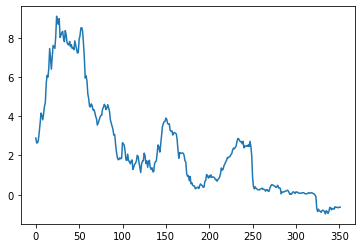

In [22]:
fig, ax = plt.subplots()
ax.plot(range(0, len(one_year_df.index)), one_year_df['Value'])

No handles with labels found to put in legend.


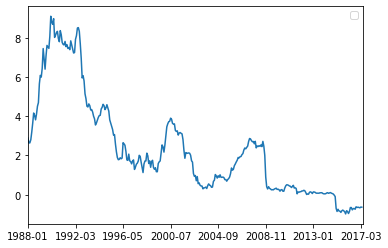

In [23]:
# Line plot with better x-axis labels
from matplotlib.ticker import FuncFormatter
def date_format(x, pos):
    idx = one_year_df['Date']
    if x >= len(idx):
        return ""
    return idx.iloc[int(x)]
formatter = FuncFormatter(date_format)

fig, ax = plt.subplots()
ax.plot(range(0, len(one_year_df.index)), one_year_df['Value'])
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(0, len(one_year_df.index))
ax.legend()
None

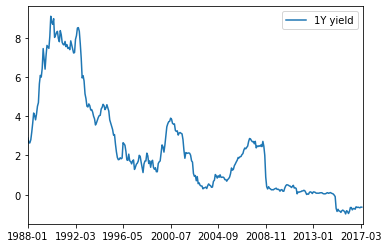

In [24]:
# Line plot with axis labels and series label
fig, ax = plt.subplots()
ax.plot(range(0, len(one_year_df.index)), one_year_df['Value'], label='1Y yield')
ax.xaxis.set_major_formatter(formatter)
ax.set_xlim(0, len(one_year_df.index))
ax.legend()
None

## Indexed by row, pandas

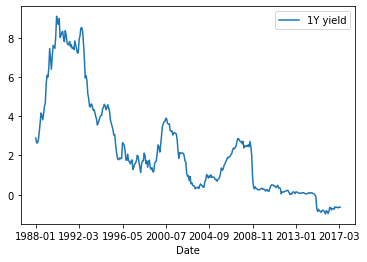

In [25]:
df[df['D0'] == '1J'].plot(x='Date', y='Value', label='1Y yield')

## Indexed by date/series

In [26]:
df = pd.read_csv("data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df.head()

Value
Date       D0        
1988-01-01 10J  4.092
           1J   2.887
           20J  4.326
           2J   3.218
           30J    NaN

In [27]:
one_year_df = df.loc[(slice(None), '1J'), :]
one_year_df.head()

,,Value
Date,D0,
1988-01-01,1J,2.887
1988-02-01,1J,2.638
1988-03-01,1J,2.641
1988-04-01,1J,2.800
1988-05-01,1J,3.191


In [28]:
tdf = one_year_df.reset_index()
tdf.head()

,Date,D0,Value
0,1988-01-01,1J,2.887
1,1988-02-01,1J,2.638
2,1988-03-01,1J,2.641
3,1988-04-01,1J,2.800
4,1988-05-01,1J,3.191


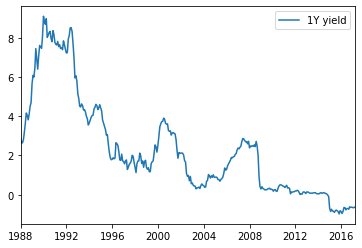

In [29]:
# Plot data, getting labels from the index
fig, ax = plt.subplots()
tdf = one_year_df.reset_index(1)
ax.plot(tdf.index, tdf['Value'], label='1Y yield')
ax.set_xlim(tdf.index[0], tdf.index[-1])
ax.legend()
None

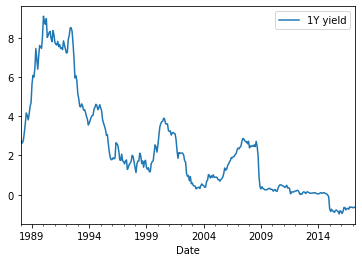

In [30]:
# Notice the more intelligent labling of x-axis
ax = one_year_df.reset_index(1).plot(y='Value', label='1Y yield')

# Styling

In [31]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

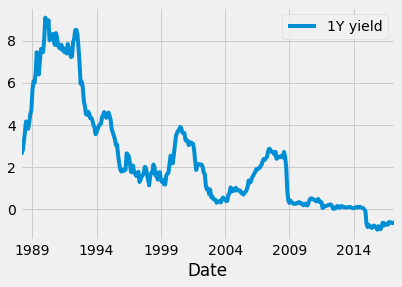

In [32]:
# plt.style.use('fivethirtyeight')
with plt.style.context(('fivethirtyeight')):
    one_year_df.reset_index(1).plot(y='Value', label='1Y yield')

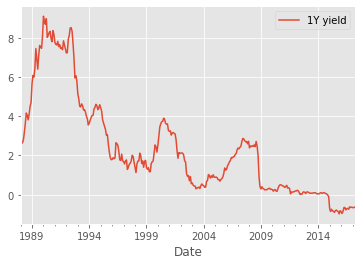

In [33]:
with plt.style.context(('ggplot')):
    one_year_df.reset_index(1).plot(y='Value', label='1Y yield')

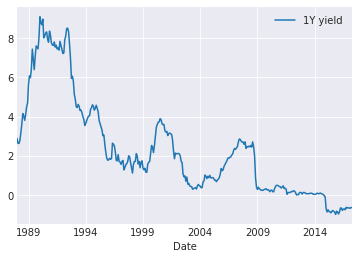

In [34]:
import seaborn as sns
with plt.style.context(('seaborn-darkgrid')):
    ax = one_year_df.reset_index(1).plot(y='Value', label='1Y yield')

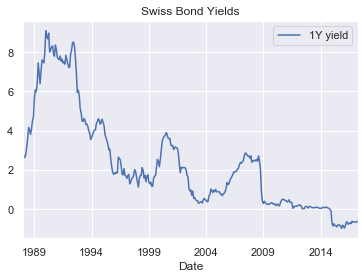

In [35]:
sns.set()
ax = one_year_df.reset_index(1).plot(y='Value', label='1Y yield')
ax.set_title("Swiss Bond Yields")
None

# Boxplots

In [36]:
df.head()

Value
Date       D0        
1988-01-01 10J  4.092
           1J   2.887
           20J  4.326
           2J   3.218
           30J    NaN

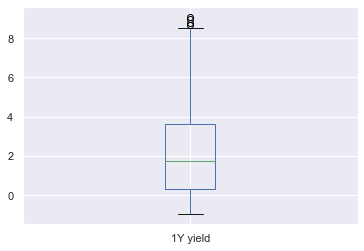

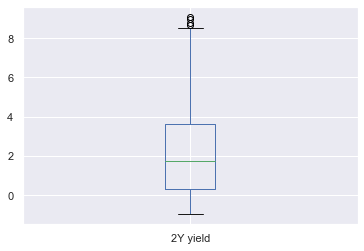

In [37]:
df.loc[(slice(None), '1J'), :].plot.box(y='Value', label='1Y yield')
df.loc[(slice(None), '1J'), :].plot.box(y='Value', label='2Y yield')

In [38]:
df = df.unstack()['Value']
df.head()

D0,10J,1J,20J,2J,30J,3J,4J,5J,6J,7J,8J,9J
Date,,,,,,,,,,,,
1988-01-01,4.092,2.887,4.326,3.218,NaN,3.393,3.554,3.695,3.810,3.904,3.980,4.041
1988-02-01,4.098,2.638,4.332,2.990,NaN,3.271,3.498,3.672,3.804,3.905,3.984,4.047
1988-03-01,3.998,2.641,4.255,3.263,NaN,3.573,3.734,3.823,3.878,3.916,3.946,3.972
1988-04-01,3.965,2.800,4.200,3.250,NaN,3.467,3.594,3.684,3.757,3.819,3.874,3.923
1988-05-01,4.127,3.191,4.247,3.602,NaN,3.802,3.909,3.974,4.019,4.054,4.082,4.106


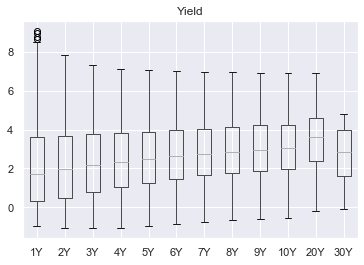

In [84]:
# Exercise: Fix the x-axis labels -- they should say 1Y, 2Y, etc.
cols = ["{}J".format(idx) for idx in range(1, 11)]
cols.extend(['20J', '30J'])
ax = df.boxplot(column=cols)
ax.set_title('Yield')
ax.axes.set_xticklabels(labels = [sign.replace('J', 'Y') for sign in cols])
None

In [83]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

# Scatterplots

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


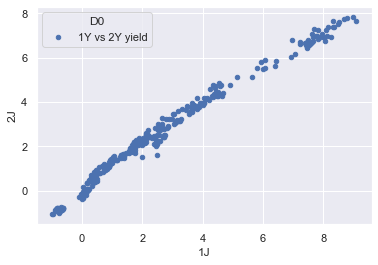

In [40]:
df.plot.scatter(x='1J', y='2J', label='1Y vs 2Y yield')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


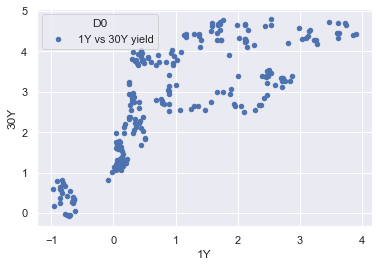

In [41]:
# Q: Why is x axis different in the vs. above plot?
ax = df.plot.scatter(x='1J', y='30J', label='1Y vs 30Y yield')
ax.xaxis.label.set_text('1Y')
ax.yaxis.label.set_text('30Y')

# Bar Charts

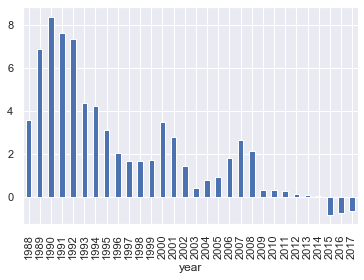

In [42]:
tdf = pd.DataFrame(df)
tdf['year'] = [x.year for x in tdf.index]
tdf.groupby('year').mean()['1J'].plot.bar(color=sns.color_palette()[0])

# Heatmaps (with Seaborn)

In [43]:
import seaborn as sns

In [74]:
df = pd.read_csv("data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.set_index(['Date', 'D0'], inplace=True)
df.sort_index(inplace=True)
df = df.unstack()['Value']
cols = ["{}J".format(idx) for idx in range(1, 11)]
cols.extend(['20J', '30J'])
df = df[cols]
df.columns.name='Yield'
df.head()

Yield,1J,2J,3J,4J,5J,6J,7J,8J,9J,10J,20J,30J
Date,,,,,,,,,,,,
1988-01-01,2.887,3.218,3.393,3.554,3.695,3.810,3.904,3.980,4.041,4.092,4.326,NaN
1988-02-01,2.638,2.990,3.271,3.498,3.672,3.804,3.905,3.984,4.047,4.098,4.332,NaN
1988-03-01,2.641,3.263,3.573,3.734,3.823,3.878,3.916,3.946,3.972,3.998,4.255,NaN
1988-04-01,2.800,3.250,3.467,3.594,3.684,3.757,3.819,3.874,3.923,3.965,4.200,NaN
1988-05-01,3.191,3.602,3.802,3.909,3.974,4.019,4.054,4.082,4.106,4.127,4.247,NaN


# Heatmap

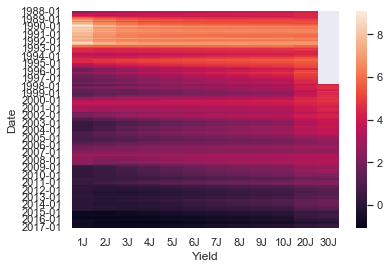

In [75]:
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, yticklabels=labels)

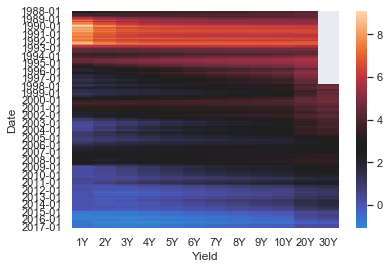

In [77]:
# Exercise: fix the x labels -- they should be 1Y, 2Y, etc
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, 
                 yticklabels=labels,
                 xticklabels = [sign.replace('J', 'Y') for sign in cols],
                 center=df.stack().mean())

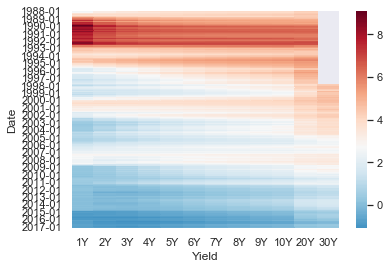

In [78]:
# Exercise: fix the x labels -- they should be 1Y, 2Y, etc
labels = [t.strftime("%Y-%m") if i%12 == 0 else "" for i, t in enumerate(df.index)]
ax = sns.heatmap(df, 
                 yticklabels=labels, 
                 xticklabels = [sign.replace('J', 'Y') for sign in cols],
                 center=df.stack().mean(), cmap='RdBu_r')

# Clustermap

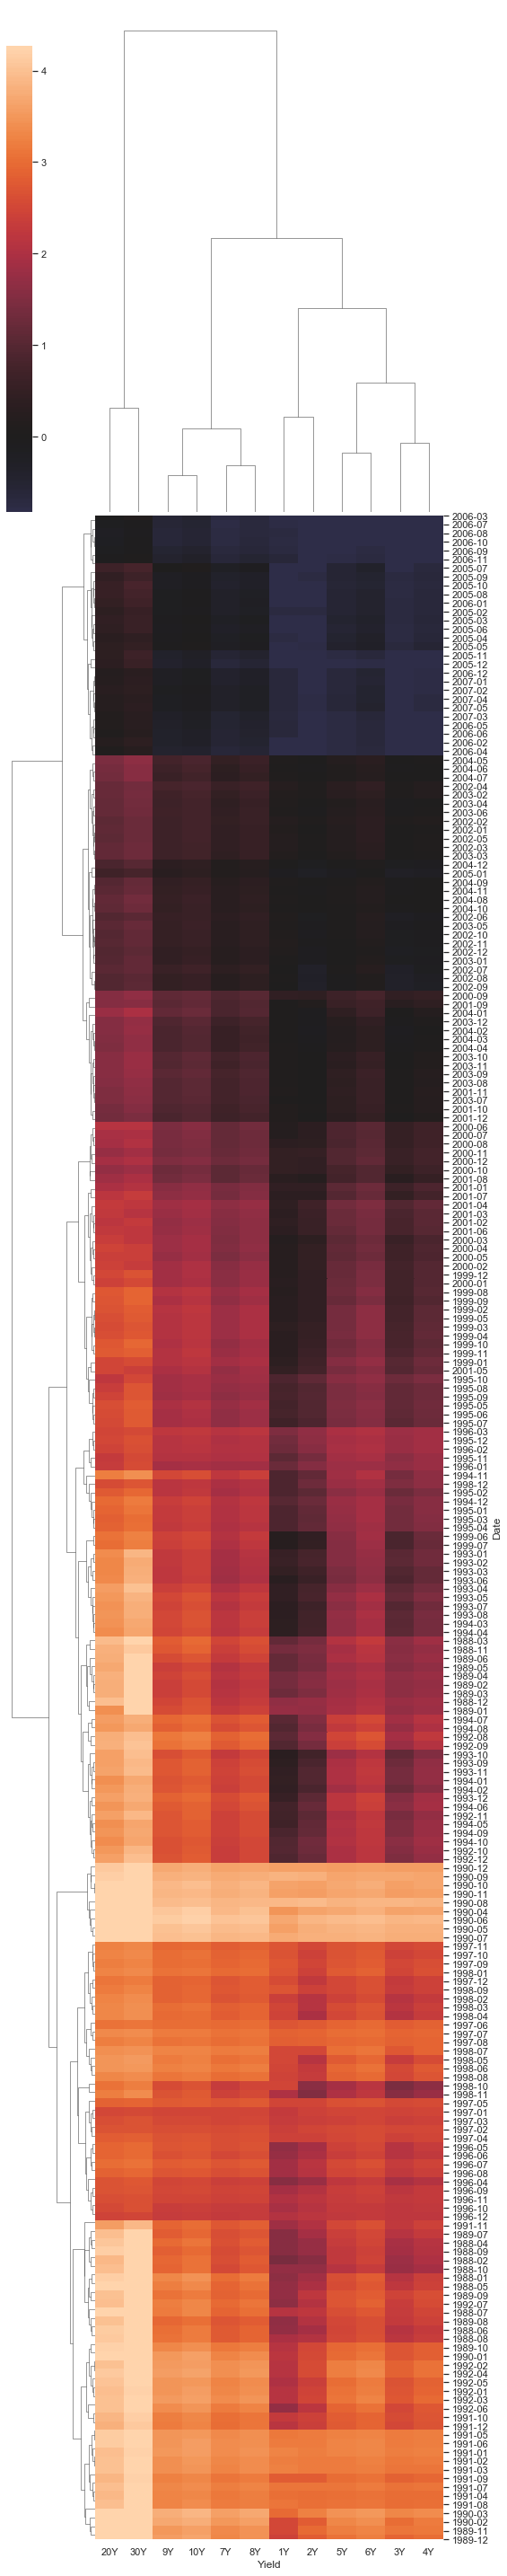

In [82]:
labels = [t.strftime("%Y-%m") for t in df.index]
cg = sns.clustermap(df.dropna(), 
                    yticklabels=labels,
                    xticklabels = [sign.replace('J', 'Y') for sign in cols],
                    center = 0,
                    robust=True, 
                    figsize=(8, 40))
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
None

# Boxplot

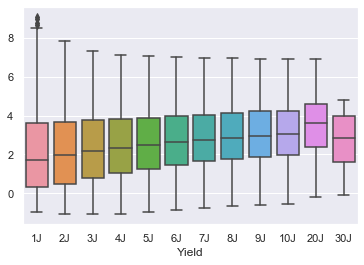

In [62]:
ax = sns.boxplot(data=df)

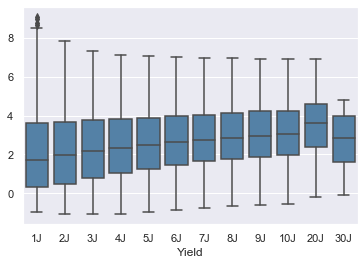

In [63]:
ax = sns.boxplot(data=df, color='steelblue')

# Scatterplot

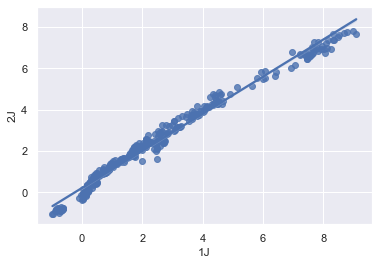

In [64]:
ax = sns.regplot(x='1J', y='2J', data=df)

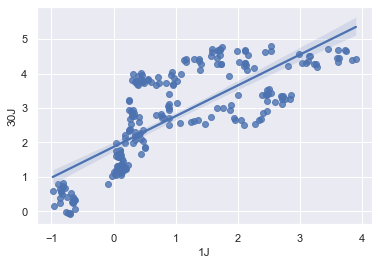

In [65]:
# Q: Why is x axis different in the vs. above plot?
ax = sns.regplot(x='1J', y='30J', data=df)

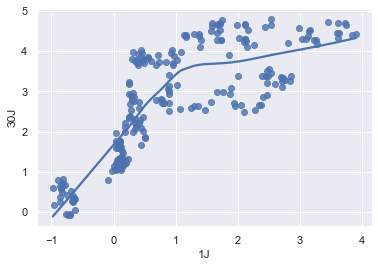

In [66]:
sns.regplot(x='1J', y='30J', lowess=True, data=df)

# Barplot

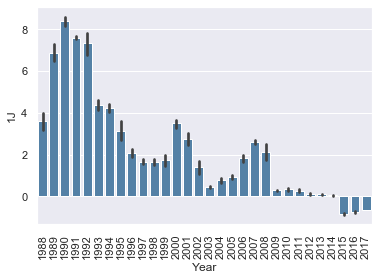

In [67]:
tdf = pd.DataFrame(df)
tdf['Year'] = [x.year for x in tdf.index]
fig, ax = plt.subplots()
sns.barplot(x='Year', y='1J', color="steelblue", data=df, ax=ax)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
None

# Altair

In [68]:
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [ ]:
df = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df.head()

In [ ]:
df = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'D0':'Duration'}, inplace=True)
df_1y = df[df['Duration'] == '1J']
alt.Chart(df_1y).mark_line().encode(
    x='Date',
    y='Value'
)

# Bokeh

In [ ]:
import bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
output_notebook()

In [ ]:
df = pd.read_csv("../data/snb-data-rendoblim-en-all-20170502_1430.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns={'D0':'Duration'}, inplace=True)

In [ ]:
tdf = df.pivot(index='Date', columns='Duration', values='Value').reset_index()
p = figure(x_axis_type="datetime")
p.line(x=tdf['Date'], y=tdf['1J'])
show(p)